All contracts are defined as in the CDC24 paper.

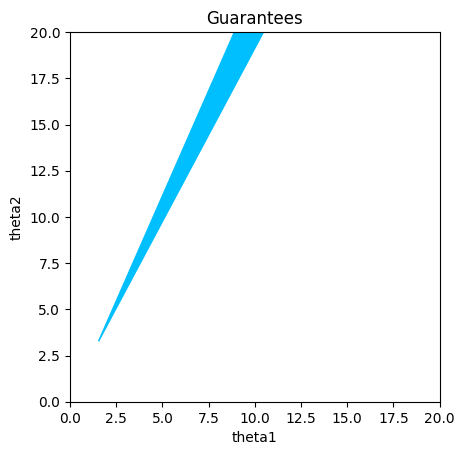

In [1]:
from pacti.contracts import PolyhedralIoContract
from pacti.utils import plots
from pacti.iocontract import Var
import numpy as np


# top-level requirements
y1_h = 0.3
y2_h = 0.6

# assumptions on the inputs
u1_s = 5
u2_s = 4.1
u1_h = 4
u2_h = 4

# sigma 1
F_1_u_max = 5
F_1_u_H = 4
# sigma 2
p2_H = 0.6
p1_H = 0.3
F_2_p_1_max = 4.1
F_2_p_1_H = 4



# top-level contract
contract_system = PolyhedralIoContract.from_strings(
    input_vars=["u1","u2"],
    output_vars=["y1","y2"],
    assumptions=[f"{u1_s} >= u1 >= {u1_h}",f"{u2_s} >= u2 >= {u2_h}"],
    guarantees=[f"y1 >= {y1_h}",f"y2 >= {y2_h}"])

# sigma 1/2
contract_sigma1 = PolyhedralIoContract.from_strings(
    input_vars=["d1","d2"],
    output_vars=["y1"],
    assumptions=[f"d1 >= {y1_h} (1 + d1 + d2)"],
    guarantees=[f"y1 >= {y1_h}"])

contract_sigma2 = PolyhedralIoContract.from_strings(
    input_vars=["d1","d2"],
    output_vars=["y2"],
    assumptions=[f"d2 >= {y2_h} (1 + d1 + d2)"],
    guarantees=[f"y2 >= {y2_h}"])

# parameter definition
contract_r1 = PolyhedralIoContract.from_strings(
    input_vars=["u1","theta1"],
    output_vars=["d1"],
    assumptions=[f"{u1_s} >= u1 >= {u1_h}"],
    guarantees=[f"{u1_h} theta1 <= d1 <= {u1_s} theta1"])

contract_r2 = PolyhedralIoContract.from_strings(
    input_vars=["u2","theta2"],
    output_vars=["d2"],
    assumptions=[f"{u2_s} >= u2 >= {u2_h}"],
    guarantees=[f"{u2_h} theta2 <= d2 <= {u2_s} theta2"])

# compose contracts
contract_sigma = contract_sigma1.compose(contract_sigma2)
contract_r = contract_r1.compose(contract_r2)

contract_existing = contract_r.compose(contract_sigma)

contract_high_requirements = contract_system.quotient(contract_existing)

_ = plots.plot_guarantees(contract=contract_high_requirements,x_var=Var("theta1"),y_var=Var("theta2"),x_lims=(0,20),y_lims=(0,20),var_values={})


Now we analyze constraints to guarantee the low thresholds

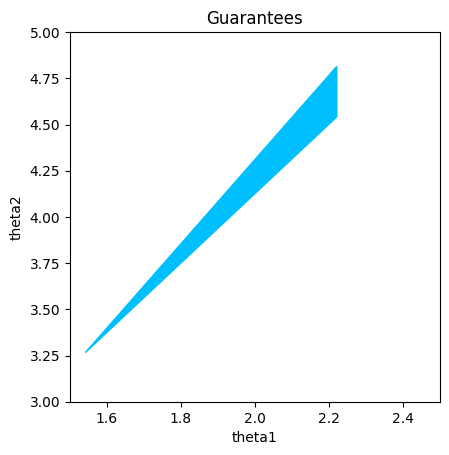

In [2]:
# top-level requirements
y1_l = 0.1
y2_l = 0.4

# assumptions on the inputs
u1_l = 0.05
u2_l = 0.05


# top-level contract
contract_system = PolyhedralIoContract.from_strings(
    input_vars=["u1","u2"],
    output_vars=["y1","y2"],
    assumptions=[f"{u1_l} >= u1 >= {0}",f"{u2_l} >= u2 >= {0}"],
    guarantees=[f"y1 <= {y1_l}",f"y2 <= {y2_l}"])

# sigma 1/2
contract_sigma1 = PolyhedralIoContract.from_strings(
    input_vars=["d1","d2"],
    output_vars=["y1"],
    assumptions=[f"d1 <= {y1_l} (1 + d1 + d2)"],
    guarantees=[f"y1 <= {y1_l}"])

contract_sigma2 = PolyhedralIoContract.from_strings(
    input_vars=["d1","d2"],
    output_vars=["y2"],
    assumptions=[f"d2 <= {y2_l} (1 + d1 + d2)"],
    guarantees=[f"y2 <= {y2_l}"])

# parameter definition
contract_r1 = PolyhedralIoContract.from_strings(
    input_vars=["u1","theta1"],
    output_vars=["d1"],
    assumptions=[f"{u1_l} >= u1 >= {0}"],
    guarantees=[f"{0} theta1 <= d1 <= {u1_l} theta1"])

contract_r2 = PolyhedralIoContract.from_strings(
    input_vars=["u2","theta2"],
    output_vars=["d2"],
    assumptions=[f"{u2_l} >= u2 >= {0}"],
    guarantees=[f"{0} theta2 <= d2 <= {u2_l} theta2"])

# compose contracts
contract_sigma = contract_sigma1.compose(contract_sigma2)
contract_r = contract_r1.compose(contract_r2)

contract_existing = contract_r.compose(contract_sigma)

contract_low_requirements = contract_system.quotient(contract_existing)

contract_requirements = contract_low_requirements.merge(contract_high_requirements)

_ = plots.plot_guarantees(contract=contract_requirements,x_var=Var("theta1"),y_var=Var("theta2"),x_lims=(1.5,2.5),y_lims=(3,5),var_values={})

In [3]:
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

_.set_size_inches(w=2, h=3)
_.savefig('multiplexed.pgf')